In [2]:
import pandas as pd, yfinance as yf
fname = 'simulate_trade_record_2023-10-3.json'
jfile = pd.read_json(fname) 
df = pd.DataFrame(jfile).iloc[1:]
df.set_index('date',inplace=True)
df['assets']= df.daily_portfolio.apply(lambda x: list(x.keys()))
df[['assets','portfolio_total_capital']].to_csv('hold_assets.csv')
portfolio_return = df.portfolio_total_capital.apply(lambda x: x/100000-1)

start = fname.split('_')[-1].split('.')[0]
today = str(dt.date.today()+dt.timedelta(days=1))
hsi = yf.download('^HSI',start=start,end=today,progress=False)
hsi_return = hsi.Close/hsi.Close.iloc[0]-1
df_return = pd.merge(hsi_return, portfolio_return, how='inner', left_index=True, right_index=True)
df_return.columns=['hsi_return','portfolio_return']

df_return.plot()

FileNotFoundError: File simulate_trade_record_2023-10-3.json does not exist

<Axes: >

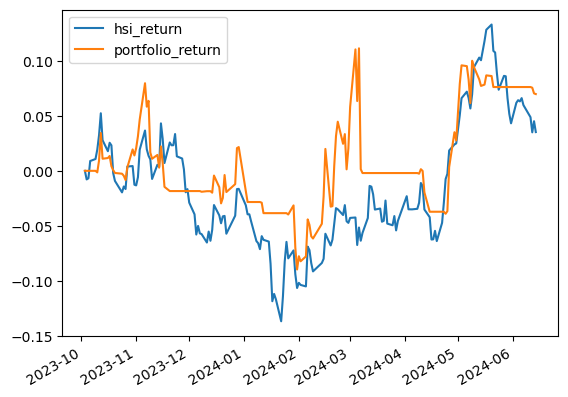

In [3]:
import pandas as pd, yfinance as yf, datetime as dt
fname = './results/simulate_trade_record_60_2023-10-3.json'
jfile = pd.read_json(fname) 
df = pd.DataFrame(jfile).iloc[1:]
df.set_index('date',inplace=True)
df['assets']= df.daily_portfolio.apply(lambda x: list(x.keys()))
df[['assets','portfolio_total_capital']].to_csv('hold_assets.csv')
portfolio_return = df.portfolio_total_capital.apply(lambda x: x/100000-1)

start = fname.split('_')[-1].split('.')[0]
today = str(dt.date.today()+dt.timedelta(days=1))
hsi = yf.download('^HSI',start=start,end=today,progress=False)
hsi_return = hsi.Close/hsi.Close.iloc[0]-1
df_return = pd.merge(hsi_return, portfolio_return, how='inner', left_index=True, right_index=True)
df_return.columns=['hsi_return','portfolio_return']

df_return.plot()

In [3]:
hsi.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-10-03,17546.390625,17546.390625,17212.869141,17331.220703,17331.220703,2102884000
1,2023-10-04,17266.820312,17266.820312,17094.000000,17195.839844,17195.839844,1294655000
2,2023-10-05,17249.970703,17336.429688,17197.609375,17213.869141,17213.869141,1088259900
3,2023-10-06,17370.029297,17603.800781,17370.029297,17485.980469,17485.980469,1141210000
4,2023-10-09,17500.369141,17633.189453,17447.759766,17517.400391,17517.400391,1221298000
...,...,...,...,...,...,...,...
167,2024-06-07,18562.480469,18575.689453,18302.330078,18366.949219,18366.949219,3310059200
168,2024-06-11,18163.119141,18267.689453,17994.099609,18176.339844,18176.339844,3528461800
169,2024-06-12,18032.400391,18063.720703,17848.759766,17937.839844,17937.839844,3139463400
170,2024-06-13,18104.130859,18173.529297,17971.570312,18112.630859,18112.630859,2331253000


In [30]:
len(hsi)

172

In [24]:
import pandas_ta as pta,sys
hsi = yf.download('^HSI',start='2023-1-1',end=today,progress=False)

print(len(hsi))
ema= pta.ema(hsi.Close, 60)
ma = pta.sma(hsi.Close,60)
print(ema.iloc[-1], ma.iloc[-1])

from data.prepare_data import prepare_data
from signal_model import Signal_Model
hsi.reset_index(inplace=True)
hsi.columns = ['date','open','high','low','close','adj close','volume']
hsi.drop(columns='adj close',inplace=True)
bdf, test_X = prepare_data(hsi, 120,1, training=False) 
print(bdf.tail(1), test_X[-1][-1])
signal = Signal_Model('lenet')
print(len(bdf),test_X.shape)
_ = signal.load_model()
preds= signal.model.predict(test_X)
preds[-1][-1]

354
17879.488108329675 17707.338899739585
          date          open          high           low         close  \
353 2024-06-14  18028.070312  18109.890625  17927.160156  17941.779297   

         volume         EMA_5        EMA_10        EMA_20        EMA_30  ...  \
353  2621288300  18095.937537  18234.650725  18337.233186  18264.764207  ...   

     difflower20  diffupper60  difflower60     RSI_5    RSI_10    RSI_20  \
353     1.020102     0.907769     1.146441  0.297277  0.372838  0.470149   

     open_chg  high_chg  low_chg  close_chg  
353 -0.004669 -0.000151 -0.01024  -0.009433  

[1 rows x 27 columns] [-0.59433826 -0.84885875 -0.91702776 -1.07659792 -0.93670908 -1.48934805
 -0.76923586 -0.67492746  0.62067763 -1.15642811 -1.15979445 -0.55523761
 -0.6657368  -0.86217747 -0.22269772 -0.71769545]
176 (176, 120, 16)
6/6 [==============================] - 0s 3ms/step


-0.41183242

In [25]:
import pandas_ta as pta,sys
hsi = yf.download('^HSI',start='2023-5-1',end=today,progress=False)

print(len(hsi))
ema= pta.ema(hsi.Close, 60)
ma = pta.sma(hsi.Close,60)
print(ema.iloc[-1], ma.iloc[-1])

from data.prepare_data import prepare_data
from signal_model import Signal_Model
hsi.reset_index(inplace=True)
hsi.columns = ['date','open','high','low','close','adj close','volume']
hsi.drop(columns='adj close',inplace=True)
bdf, test_X = prepare_data(hsi, 120,1, training=False) 
print(bdf.tail(1), test_X[-1][-1])
signal = Signal_Model('lenet')
print(len(bdf),test_X.shape)
_ = signal.load_model()
preds= signal.model.predict(test_X)
preds[-1][-1]

276
17879.43173745016 17707.338899739585
          date          open          high           low         close  \
275 2024-06-14  18028.070312  18109.890625  17927.160156  17941.779297   

         volume         EMA_5        EMA_10        EMA_20        EMA_30  ...  \
275  2621288300  18095.937537  18234.650725  18337.233186  18264.764209  ...   

     difflower20  diffupper60  difflower60     RSI_5    RSI_10    RSI_20  \
275     1.020102     0.907769     1.146441  0.297277  0.372838  0.470149   

     open_chg  high_chg  low_chg  close_chg  
275 -0.004669 -0.000151 -0.01024  -0.009433  

[1 rows x 27 columns] [-0.59433826 -0.84885875 -0.91702776 -1.07659792 -0.93670908 -1.48934805
 -0.76923586 -0.67492746  0.62067763 -1.15642811 -1.15979444 -0.55520838
 -0.6657368  -0.86217747 -0.22269772 -0.71769545]
98 (98, 120, 16)
4/4 [==============================] - 0s 3ms/step


-0.41183168

In [18]:
import pandas_ta as pta
ema= pta.ema(hsi.iloc[40:]['Close'], 60)
ma = pta.sma(hsi.iloc[40:]['Close'], 60)
print(ema.iloc[-1], ma.iloc[-1])

KeyError: 'Close'